In [108]:
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify as ly
import IPython.display as ipd

sp.init_printing()

x, y, z, t, a, b, c, b, α, β, γ, δ = sp.symbols('x y z t a b c b α β γ δ')
j, k, l, m, n = sp.symbols('j k l m n', integer=True)
f, g, h = sp.symbols('f g h', cls=sp.Function)

π=sp.pi
e=sp.exp(1)
i=sp.sqrt(-1)

deco = {
    #'diff': '\\left( {o} \\right)^\\prime',
    'diff': '\\frac d {{d{a[0]}}}\\left( {o} \\right)',
    'integrate': '\\int \\left( {o} \\right) d{a[0]}',
    'evalf': '\\left. {o} \\right| \\left( {subs} \\right)',
}

def lps(objs):
    return " ".join(o if type(o) is str else sp.latex(o) for o in objs)

def lpl(objs):
    return "$" + lps(objs) + "$"

def lp(objs):
    display(ipd.Math(lps(objs)))

def px(obj, d, f, *args, **kwargs):
    result = getattr(obj, f)(*args, **kwargs)
    if d or f in deco:
        if not d:
            d = deco[f]
        display(ipd.Math(d.format(o=sp.latex(obj), a=args, **kwargs) + ' = ' + sp.latex(result)))
    else:
        lp([obj, '=', result])
    return result

def pxn(objl, objr, d, f, *args, **kwargs):
    resultr = getattr(objr, f)(*args, **kwargs)
    if d or f in deco:
        if not d:
            d = deco[f]
        display(ipd.Math(d.format(o=sp.latex(objl), a=args, **kwargs) + ' = ' + d.format(o=sp.latex(objr), a=args, **kwargs) + ' = ' + sp.latex(resultr)))
    else:
        lp([objl, '=', objr, '=', resultr])
    return resultr

In [109]:
import matplotlib.ticker as tck
import matplotlib.pyplot as plt

def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

my slope: 1.5137789040228031, my intercept: 4.114254038644294


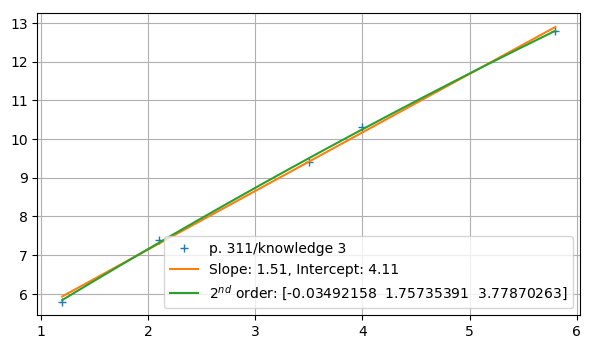

In [110]:
#figure, plot = plt.subplots(figsize=(12, 9), dpi=100)
figure, plot = plt.subplots(figsize=(7, 4), dpi=100)
plot.grid()

#x     = np.linspace(start=-math.pi, stop=math.pi, num=300)
#y     = np.sin(x)
#sin,  = plot.plot(x, y, label='$y = sin(x)$')
#y     = np.sin(x**2)
#sin2, = plot.plot(x, y, label='$y = sin(x^2)$')

xc = [1.2, 2.1, 3.5, 4, 5.8]
yc = [5.8, 7.4, 9.4, 10.3, 12.8]

xn = np.array(xc)
yn = np.array(yc)
sxy = np.sum(xn*yn) - np.sum(xn)*np.sum(yn)/len(xc)
sxx = np.sum(xn*xn) - np.sum(xn)**2/len(xc)
b=sxy/sxx
a=np.average(yc)-b*np.average(xc)
print(f'my slope: {b}, my intercept: {a}')

xy, = plot.plot(xc, yc, '+', label='p. 311/knowledge 3')
xs = np.linspace(np.min(xc), np.max(xc), 500)
xyreg = np.polyfit(xc, yc, 1)
xypre = np.poly1d(xyreg)
xylin, = plot.plot(xs, xypre(xs), label=f'Slope: {xyreg[0]:0.3}, Intercept: {xyreg[1]:0.3}')
xyreg2 = np.polyfit(xc, yc, 2)
xypre2 = np.poly1d(xyreg2)
xylin2, = plot.plot(xs, xypre2(xs), label=f'$2^{{nd}}$ order: {xyreg2}')



#plot.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter(denominator=4)))
#plot.xaxis.set_major_locator(tck.MultipleLocator(np.pi/4))

#plt.legend(handles=[sin, sin2], loc='best')
plt.legend(handles=[xy, xylin, xylin2], loc='best')
plt.show()

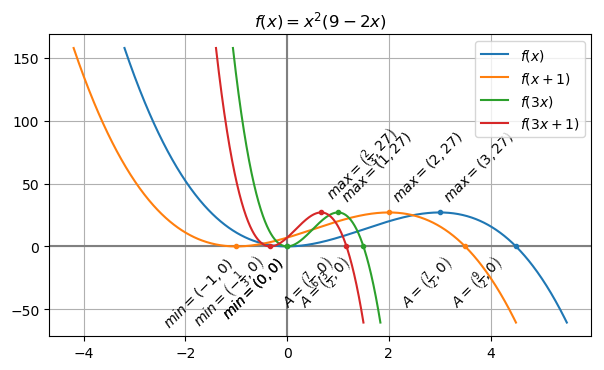

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [167]:
figure, plot = plt.subplots(figsize=(7, 4), dpi=100)
plot.grid()

plt.axhline(color="grey")
plt.axvline(color="grey")
plt.title(lpl([f(x), '=', fx]))

fx = x**2 * (9 - 2 * x)

#lp([f(x), '=', fx])
#lp([f(x), '=', fx, '=', fx.expand()])
#lp(["f'(x) =", fx.expand().diff(x), '=', fx.diff(x).factor()])
#pxn(f(x), fx.expand(), '', 'diff', x)
fp = []

def plotf(xf, xo):
    global fp
    fxs = fx.subs(x, x*xf+xo)
    fxsv = ly(x, fxs, 'numpy')
    xc = np.linspace(start=(-3.2-xo)/xf, stop=(5.5-xo)/xf, num=871)
    yc = fxsv(xc)
    x1, x2 = sp.solve(fxs.diff(x), x)
    y1, y2 = fxsv(np.array([x1, x2]))
    xr = sp.solve(fxs, x)
    nxr = len(xr)
    
    fp = fp + plot.plot(xc, yc, label=lpl([f((x if xf is 1 else xf*x) if xo is 0 else (x+xo if xf is 1 else xf*x+xo)),]))
    c = fp[-1].get_color()
    plt.plot([x1, x2, xr[-1]], [y1, y2, 0], '.', color=c)
    plt.annotate(f"$min = \\left( {sp.latex(x1)}, {sp.latex(y1)} \\right)$", (x1, y1), ha='right', xytext=(0, -15), textcoords='offset points', rotation=45)
    plt.annotate(f"$max = \\left( {sp.latex(x2)}, {sp.latex(y2)} \\right)$", (x2, y2), ha='left', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=45)
    plt.annotate(f"$A = \\left( {sp.latex(xr[-1])}, 0 \\right)$", (xr[-1], 0), ha='right', xytext=(-5, -15), textcoords='offset points', rotation=45)

plotf(1, 0)
plotf(1, 1)
plotf(3, 0)
plotf(3, 1)
plt.legend(handles=fp, loc='best')
plt.show()

lp(["f(x) \\rightarrow f(x + 1): translate (-1, 0)",])
lp(["f(x) \\rightarrow f(2 x): scale \\left( \\frac 1 2, 0 \\right)",])
lp(["f(x) \\rightarrow f(2 x + 1) \\equiv f(x) \\rightarrow f(2 x) \\rightarrow f(2 x + 1)",])
lp(["X = 2 x + 1 \\rightarrow x = \\frac {X - 1} {2} = \\frac X 2 - \\frac 1 2"])
lp(["f(x) \\rightarrow f(2 x + 1) \\equiv f(\\frac {X - 1} {2}) \\rightarrow f(X): translate (-1, 0) \\rightarrow scale \\left( \\frac 1 2, 1 \\right)",])
lp(["f(x) \\rightarrow f(2 x + 1) \\equiv f(\\frac X 2 - \\frac 1 2) \\rightarrow f(X): scale \\left( \\frac 1 2, 1 \\right) \\rightarrow translate (- \\frac 1 2, 0)",])
